In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from qutip import *

[Lecture 0 - Introduction to QuTiP - The Quantum Toolbox in Python](https://github.com/jrjohansson/qutip-lectures/blob/master/Lecture-0-Introduction-to-QuTiP.ipynb)

In [21]:
up = Qobj([[1], [0]])

In [22]:
up

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

In [6]:
sigmax()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]

In [9]:
sigmay()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]

In [8]:
sigmaz()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]

In [23]:
 basis(2, 0)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

In [25]:
sigmaz()* basis(2, 1)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[ 0.]
 [-1.]]

In [26]:
2 * np.pi * 0.1 * sigmax()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.         0.62831853]
 [0.62831853 0.        ]]

In [28]:
qeye(2)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 1.]]

http://qutip.org/docs/latest/guide/dynamics/dynamics-master.html#unitary-evolution

In [459]:
H = 1 * qeye(2)
psi0 = basis(2, 0)
times = np.linspace(0.0, 10.0, 1000)
result = sesolve(H, psi0, times, [sigmaz()])

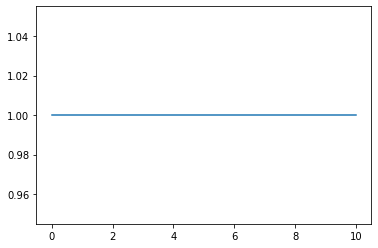

In [460]:
fig, ax = plt.subplots()
ax.plot(result.times, result.expect[0]);

In [461]:
result = sesolve(H, psi0, times, [])


In [462]:
np.real(result.states[14])


array([[0.99019656],
       [0.        ]])

In [463]:
result.states[18]

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.98381164-0.17920565j]
 [0.        +0.j        ]]

In [464]:
P0 = np.zeros(len(times))
P0real = np.zeros(len(times))
P1 = np.zeros(len(times))
P1real = np.zeros(len(times))

for i, state in enumerate(result.states):
    P = np.abs(state)**2
    P0[i] = P[0]
    P0real[i] = np.real(state)[0]
    P1[i] = P[1]
    P1real[i] = np.imag(state)[1]
    
df = pd.DataFrame(data={"P0":P0, "P1":P1, "P0_real":P0real, "P1_imag":P1real}, index=times)

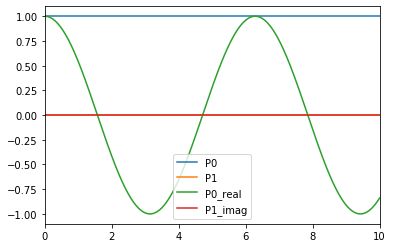

In [465]:
df.plot()

time dependence

http://qutip.org/docs/latest/guide/dynamics/dynamics-time.html#function-based-time-dependence

In [273]:
H0 = sigmaz()
H1 = - 0.1 * sigmax()

In [296]:
H = [H0,[H1,'cos(0.4*np.pi*t)']]

In [297]:
result = sesolve(H, psi0, times, [])


In [298]:
times = np.linspace(0.0, 10.0, 10000)
P0 = np.zeros(len(times))
P1 = np.zeros(len(times))
for i, state in enumerate(result.states):
    P = np.abs(state)**2
    P0[i] = P[0]
    P1[i] = P[1]
    
df = pd.DataFrame(data={"P0":P0, "P1":P1}, index=times)

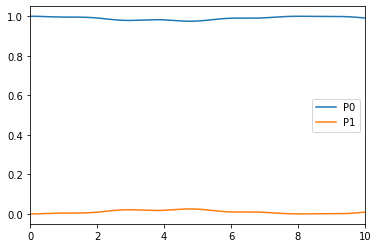

In [299]:
df.plot()